# Part 1: Data Exploration and Preparation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from google.colab import drive
drive.mount('/content/drive')
trainpath = '/content/drive/MyDrive/COMP4211/PA1/train.csv'
testpath = '/content/drive/MyDrive/COMP4211/PA1/test.csv'
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold,SelectKBest
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error,roc_curve, roc_auc_score
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import pipeline
import sklearn
import scipy
from sklearn.ensemble import IsolationForest
import time
#load train.csv using padas
df = pd.read_csv(trainpath)
df.head()

Mounted at /content/drive


,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C23,C24,C25,C26,C27,C28,C29,C30,regression target,classification target
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,65.00,Portuguese,no,no,...,5.0,5,0.0,0.000000,0,11.1,0.6,2.02,0.6500,failure
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,65.00,Portuguese,no,no,...,6.0,14,2.0,11.333333,0,11.1,0.6,2.02,0.5500,success
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,59.50,Portuguese,yes,no,...,6.0,8,6.0,13.625000,0,10.8,1.4,1.74,0.6160,success
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year)...,66.55,Portuguese,no,no,...,6.0,0,0.0,0.000000,0,15.5,2.8,-4.06,0.5175,failure
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,71.00,Portuguese,yes,no,...,7.0,7,6.0,13.900000,0,7.6,2.6,0.32,0.6865,success


In [2]:
npdf = np.array(df)

In [3]:
# first 3 numerical values: C6,C14,C16
#identify potential outliers
Array = ["C6","C14","C16"]

#IQR method
for x in Array:
  q1 = df[x].quantile(0.25)
  q3 = df[x].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  print('In',x,f'Lower bound: {lower_bound} Upper bound: {upper_bound}')
  npa = np.array(df[x])
  print(npa[np.logical_or(npa>upper_bound,npa<lower_bound)])

In C6 Lower bound: 51.25 Upper bound: 81.25
[50.   50.   88.5  84.   84.   85.   50.   86.   90.   82.   90.   85.
 50.   85.   81.5  85.   90.   83.5  50.   50.   86.   50.   50.   85.
 50.   50.   50.   50.   50.   85.   50.   85.   50.   50.   83.5  50.
 84.   50.5  50.5  50.   50.   50.   90.   50.   50.   84.   50.   49.5
 95.   50.   48.   50.   84.   85.   50.   50.   51.   84.5  50.   48.
 85.   83.5  50.5  51.   81.5  83.   86.   50.   81.5  50.   49.5  85.
 83.   84.   91.   81.5  50.   86.   84.   47.5  85.   83.5  86.   50.
 50.   82.5  50.   50.   81.65 50.   50.   50.   50.   50.   50.   89.
 94.   81.5  50.   50.   51.   50.   50.   85.   50.   87.5  92.2  90.
 50.   50.5  85.   51.   88.   82.5  85.   82.   86.   50.   50.   50.
 50.   82.   48.5  85.   50.   50.   50.   50.   50.   50.   82.5  50.5
 50.   90.   85.   85.   82.   90.   50.   82.5  50.   95.   82.   50.
 90.   88.5  50.  ]
In C14 Lower bound: 10.0 Upper bound: 34.0
[35 42 35 38 42 39 48 35 36 43 38 43 36

In [4]:

for x in Array:
  clf = IsolationForest(random_state=0)
  outliers = clf.fit_predict(np.array(df[[x,"regression target"]]))
  print(df[[x,"regression target"]][outliers == -1])
  print((outliers == -1).astype(int).sum())


         C6  regression target
9     80.00             0.7075
12    80.00             0.6200
18    50.00             0.5500
20    50.00             0.5000
29    80.00             0.8000
...     ...                ...
3515  74.00             0.8170
3518  65.00             0.5265
3526  66.55             0.4800
3530  62.50             0.7040
3536  50.00             0.5640

[753 rows x 2 columns]
753
      C14  regression target
0      35             0.6500
3      42             0.5175
14     22             0.7500
18     30             0.5500
20     19             0.5000
...   ...                ...
3515   20             0.8170
3518   36             0.5265
3522   28             0.5500
3523   37             0.6450
3526   19             0.4800

[907 rows x 2 columns]
907
      C16  regression target
3       0             0.5175
5       2             0.7000
12      2             0.6200
14      1             0.7500
17      3             0.6100
...   ...                ...
3512    7            

In [5]:
##Q5
df.corr()

<ipython-input-5-aa3b62442b84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,regression target
C6,1.000000,-0.111374,-0.018841,-0.045938,-0.077389,0.038950,0.062857,0.001539,-0.027408,-0.046306,-0.070843,0.045212,0.050645,-0.012927,0.053305,0.009745,-0.045325,0.576126
C14,-0.111374,1.000000,0.225047,0.136557,0.134538,-0.056920,-0.152041,0.042320,0.208677,0.084241,0.045085,-0.110133,-0.171983,0.048981,0.015652,0.029895,-0.058545,-0.030737
C16,-0.018841,0.225047,1.000000,0.764918,0.549814,0.619279,0.125667,0.132142,0.942614,0.625563,0.421601,0.475408,0.135160,0.071164,0.001702,0.045499,-0.034690,0.024843
C17,-0.045938,0.136557,0.764918,1.000000,0.687466,0.772668,0.396275,0.141358,0.745162,0.941014,0.601553,0.674216,0.379112,0.084136,0.032405,0.046022,-0.033280,-0.053833
C18,-0.077389,0.134538,0.549814,0.687466,1.000000,0.527342,0.414727,0.267813,0.530025,0.618744,0.781797,0.451622,0.366609,0.152765,0.060522,0.005661,-0.109825,-0.082831
C19,0.038950,-0.056920,0.619279,0.772668,0.527342,1.000000,0.708144,0.003829,0.597771,0.734093,0.541350,0.901075,0.693776,-0.041140,0.052776,0.000134,0.007477,0.065448
C20,0.062857,-0.152041,0.125667,0.396275,0.414727,0.708144,1.000000,-0.073162,0.115932,0.427075,0.486700,0.681601,0.835170,-0.072265,0.017668,-0.042260,0.058846,0.079161
C21,0.001539,0.042320,0.132142,0.141358,0.267813,0.003829,-0.073162,1.000000,0.138314,0.115713,0.161132,0.004732,-0.064008,0.574405,-0.043567,-0.044023,-0.141835,0.010154
C22,-0.027408,0.208677,0.942614,0.745162,0.530025,0.597771,0.115932,0.138314,1.000000,0.661197,0.429203,0.506688,0.131569,0.088517,0.002795,0.039426,-0.033470,0.027379
C23,-0.046306,0.084241,0.625563,0.941014,0.618744,0.734093,0.427075,0.115713,0.661197,1.000000,0.608867,0.704679,0.413252,0.070042,0.059416,0.026709,-0.011946,-0.058127


# Part 2

# Q7

In [6]:
#Q7 SimpleImputer

#Features with missing values!
num_con_values = df[['C20','C29']].values
num_dis_values = df[['C17','C22','C23','C25']].values
cat_nom_values = df[['C0']].values
cat_ord_values = df[['C5']].values
cat_bin_values = df[['C4','C8','C9','C11','C12','C13','C15']].values

# meandf = pd.DataFrame()
# mediandf = pd.DataFrame()
# consdf = pd.DataFrame()
# modedf = pd.DataFrame()


#Imputation
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
zero_imputer = SimpleImputer(strategy='constant', fill_value=0)
mode_imputer = SimpleImputer(strategy='most_frequent', fill_value=0)

#Median strategy are chose for numerical data since we haven't clean any outliers in feature columns!
df[['C20','C29']] = median_imputer.fit_transform(num_con_values)
df[['C17','C22','C23','C25']] = median_imputer.fit_transform(num_dis_values)

#Mode strategy are chose for categorical data since we want to preseve the distribution of categorical features
df[['C4','C8','C9','C11','C12','C13','C15']] = mode_imputer.fit_transform(cat_bin_values)
df[['C5']] = mode_imputer.fit_transform(cat_ord_values)
df[['C0']] = mode_imputer.fit_transform(cat_nom_values)
#print(df.isnull().any())

# #Mean
# meandf[['Continuous_C20','Continuous_C29']] = mean_imputer.fit_transform(num_con_values)
# meandf[['Discrete_C17','Discrete_C22','Discrete_C23','Discrete_C25']] = mean_imputer.fit_transform(num_dis_values)
# meandf = meandf.add_suffix("_mean")
# print(meandf)

# #Median
# mediandf[['Continuous_C20','Continuous_C29']] = median_imputer.fit_transform(num_con_values)
# mediandf[['Discrete_C17','Discrete_C22','Discrete_C23','Discrete_C25']] = median_imputer.fit_transform(num_dis_values)
# mediandf = mediandf.add_suffix("_median")
# print(mediandf)

# #Mode
# modedf[['Continuous_C20','Continuous_C29']] = mode_imputer.fit_transform(num_con_values)
# modedf[['Discrete_C17','Discrete_C22','Discrete_C23','Discrete_C25']] = mode_imputer.fit_transform(num_dis_values)
# modedf[['Binary_C4','Binary_C8','Binary_C9','Binary_C11','Binary_C12','Binary_C13','Binary_C15']] = mode_imputer.fit_transform(cat_bin_values)
# modedf[['Ordinal_C5']] = mode_imputer.fit_transform(cat_ord_values)
# modedf[['Nominal_C0']] = mode_imputer.fit_transform(cat_nom_values)
# modedf = modedf.add_suffix("_mode")
# print(modedf)

# #Constant
# consdf[['Continuous_C20','Continuous_C29']] = zero_imputer.fit_transform(num_con_values)
# consdf[['Discrete_C17','Discrete_C22','Discrete_C23','Discrete_C25']] = zero_imputer.fit_transform(num_dis_values)
# consdf[['Binary_C4','Binary_C8','Binary_C9','Binary_C11','Binary_C12','Binary_C13','Binary_C15']] = zero_imputer.fit_transform(cat_bin_values)
# consdf[['Ordinal_C5']] = zero_imputer.fit_transform(cat_ord_values)
# consdf[['Nominal_C0']] = zero_imputer.fit_transform(cat_nom_values)
# consdf = consdf.add_suffix("_constant")
# print(consdf)




In [7]:
df.columns[df.isnull().sum() != 0]

Index([], dtype='object')

# Q8: Normalization and Standardization:
 Normalize/standardize different types of numerical
features using StandardScaler, MinMaxScaler, or RobustScaler. You need to report the
first numerical feature column of the first 10 samples before and after processing. Briefly discuss
the difference between these techniques and when to use each.

In [8]:
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

num_data = df.select_dtypes(include=[np.number])

minmax_df = df.copy()
std_df = df.copy()
robust_df = df.copy()

minmax_df[num_data.columns] = minmax_scaler.fit_transform(num_data)
std_df[num_data.columns] = std_scaler.fit_transform(num_data)
robust_df[num_data.columns] = robust_scaler.fit_transform(num_data)

# Finally decide to use robust since it prevents the data from outliers problem
df[num_data.columns] = robust_scaler.fit_transform(num_data)
#report 10 items for C6(first numerical feature column)



print("First numerical feature column C6 before processing")
print(df.loc[:, 'C6'].head(10))
print("First numerical feature column C6 after minmax processing")
print(minmax_df.loc[:,'C6'].head(10))
print("First numerical feature column C6 after standard processing")
print(std_df.loc[:,'C6'].head(10))
print("First numerical feature column C6 after robust processing")
print(robust_df.loc[:,'C6'].head(10))

First numerical feature column C6 before processing
0   -0.206667
1   -0.206667
2   -0.940000
3    0.000000
4    0.593333
5    0.460000
6   -1.206667
7   -0.140000
8    0.460000
9    1.793333
Name: C6, dtype: float64
First numerical feature column C6 after minmax processing
0    0.368421
1    0.368421
2    0.252632
3    0.401053
4    0.494737
5    0.473684
6    0.210526
7    0.378947
8    0.473684
9    0.684211
Name: C6, dtype: float64
First numerical feature column C6 after standard processing
0   -0.200135
1   -0.200135
2   -1.031074
3    0.034039
4    0.706344
5    0.555264
6   -1.333234
7   -0.124595
8    0.555264
9    2.066063
Name: C6, dtype: float64
First numerical feature column C6 after robust processing
0   -0.206667
1   -0.206667
2   -0.940000
3    0.000000
4    0.593333
5    0.460000
6   -1.206667
7   -0.140000
8    0.460000
9    1.793333
Name: C6, dtype: float64


# Q9 :Encoding Categorical Variables:
Utilize OneHotEncoder and OrdinalEncoder to encode
different types of categorical variables. You need to report the first categorical feature
column of the first 10 samples before and after processing. Briefly explain the scenarios where
each encoding technique is preferred.

In [9]:
onehot_encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder()

onehot_encoded_df = pd.DataFrame()
ordinal_encoded_df = pd.DataFrame()
onezero_encoded_df = pd.DataFrame()

cat_data = df[df.columns.difference(num_data.columns)]

# One-hot encoding
for collabel in cat_data.columns:
  onehot_encoded = onehot_encoder.fit_transform(cat_data[[collabel]])
  new_col_name = [collabel + '_' + str(category) for category in onehot_encoder.categories_[0]]
  onehot_encoded_col = pd.DataFrame(onehot_encoded, columns=new_col_name)
  onehot_encoded_df = pd.concat([onehot_encoded_df,onehot_encoded_col],axis=1)
# print(onehot_encoded_df)

# Ordinal encoding
# df[[collabel]] = ordinal_encoded
ordinal_encoded = ordinal_encoder.fit_transform(cat_data)
ordinal_encoded_col = pd.DataFrame(ordinal_encoded , columns = cat_data.columns)
ordinal_encoded_df = pd.concat([ordinal_encoded_df,ordinal_encoded_col],axis=1)
ordinal_encoded_df = ordinal_encoded_df.astype(int)

#Encode binary features to 1 and 0
#binary:C4,C8,C9,C10,C11,C12,C13,C15,classification target
Binary = ['C4','C8','C9','C10','C11','C12','C13','C15','classification target']
mapping = {'no': 0, 'yes': 1,'success':1,'failure':0,'daytime':0,'evening':1,'female':0,'male':1}
for collabel in Binary:
  onezero_encoded_df[collabel] = df[collabel].map(mapping)

#Finally, decides to do one-hot on nominal, ordinal on ordinal feature and one-zero coding on binary feature
#Ordinal: C2, C5
#One-hot:C0,C1,C3,C7
#Binary : C4,C8,C9,C10,C11,C12,C13,C15
one_hot = ['C0','C1','C3','C7']
one_hoted = []
for collabel in cat_data.columns:
  onehot_encoded = onehot_encoder.fit_transform(cat_data[[collabel]])
  new_col_name = [collabel + '_' + str(category) for category in onehot_encoder.categories_[0]]
  if collabel in one_hot:
    one_hoted.append(new_col_name)
Ordinal= ['C2','C5']
new_df = df.select_dtypes(include=[np.number]) # Robustscaler
new_df = pd.concat([new_df,ordinal_encoded_df[Ordinal]],axis=1) # C2,C5
for collabel in Binary:#Binary
  new_df[collabel]=onezero_encoded_df[collabel]

for i in one_hoted:
  new_df= pd.concat([new_df,onehot_encoded_df[i]],axis=1) # One-hot for nominal




no of categories in C0 is: 6
no of categories in C1 is: 18
no of categories in C10 is: 2
no of categories in C11 is: 2
no of categories in C12 is: 2
no of categories in C13 is: 2
no of categories in C15 is: 2
no of categories in C2 is: 8
no of categories in C3 is: 17
no of categories in C4 is: 2
no of categories in C5 is: 17
no of categories in C7 is: 19
no of categories in C8 is: 2
no of categories in C9 is: 2
no of categories in classification target is: 2


# Q10:Feature Selection:
 Use at least two feature selection modules in scikit-learn, such as VarianceThreshold and SelectKBest. Think about how feature selection impacts the performance of your models. You need to report which features were removed for what reasons.


In [11]:
train_y = new_df[['regression target','classification target']]
train_x = new_df[new_df.columns.difference(train_y.columns)] # with encoding, scaling, filling missing data!


#Variance Threshold
Vselector = VarianceThreshold(threshold=0.2)
Variancedf = Vselector.fit_transform(train_x)
print(train_x.columns[Vselector.get_support()== False])
#SelectKBest
Kselector1 = SelectKBest(k=12) #default function only works for classification task, default k =10,
Kselector2 = SelectKBest(f_regression,k=12)
SelKBestdf1 = Kselector1.fit_transform(train_x,train_y['classification target'])
SelKBestdf2 = Kselector2.fit_transform(train_x,train_y['regression target'])
print(train_x.columns[Kselector1.get_support()== False])
print(train_x.columns[Kselector2.get_support()== False])

Index(['C0_divorced', 'C0_facto union', 'C0_legally separated', 'C0_married',
       'C0_single', 'C0_widower', 'C10', 'C11', 'C13', 'C15',
       'C1_1st phase - special contingent (Azores Island)',
       'C1_1st phase - special contingent (Madeira Island)',
       'C1_2nd phase - general contingent',
       'C1_3rd phase - general contingent', 'C1_Change of course',
       'C1_Change of institution/course',
       'C1_Change of institution/course (International)',
       'C1_Holders of other higher courses',
       'C1_International student (bachelor)',
       'C1_Ordinance No. 533-A/99, item b2) (Different Plan)',
       'C1_Ordinance No. 533-A/99, item b3 (Other Institution)',
       'C1_Ordinance No. 612/93', 'C1_Ordinance No. 854-B/99',
       'C1_Over 23 years old', 'C1_Short cycle diploma holders',
       'C1_Technological specialization diploma holders', 'C1_Transfer',
       'C3_Advertising and Marketing Management', 'C3_Agronomy',
       'C3_Animation and Multimedia Design'

# Part 3

6.1 Linear Regression
In this task, you will build six linear regression models in the first step, where each model uses
only one feature (not necessary to be those selected in [Q10]) to find whether it is correlated
with the regression target (the second last column). (Hints: It is easier to work with binary
categorical or continuous numerical features as independent variables)
Then, in the second step, you will build another linear regression model to explore the relationship
between linear combinations of the six selected features and the regression target.
You are required to use the train test split submodule in scikit-learn to split the data in
train.csv, with 80% for training and 20% for validation. You should set random state = 4211
for reproducibility.

In [12]:

#Split the data set
train,valid = train_test_split(new_df, test_size=0.2, random_state=4211)
x_train = train[new_df.columns.difference(train_y.columns)]
x_valid = valid[new_df.columns.difference(train_y.columns)]
y_train = train['regression target']
y_valid = valid['regression target']


#[Q12]
After training the seven models described above using the training set, use them to make
predictions on the validation set. Report the validation R2 score of each of the models to evaluate
the relationship between different features and the regression target.

# [Q13]
Report the mean squared error of each of the seven models in the validation set and compare
them based on the two performance metrics, i.e., R2 score and mean squared error.

In [20]:
# 6 features I wanna use:C2,C6,C20,C26,C28,C29,

#Build six linear regression models
q12_features = ['C2','C6','C13','C15','C28','C29']
regressor = LinearRegression()
for i in q12_features:
  model = regressor.fit(np.array(x_train[i]).reshape(-1,1),y_train)
  # print the validation set r2 score Q12
  y_pred = model.predict(np.array(x_valid[i]).reshape(-1,1))
  print(i,"model's Validation R^2 score:", r2_score(y_valid.values, y_pred))
  mse = mean_squared_error(y_valid, y_pred)
  print(i,"model's mean squared error:",mse)
# The seventh model
seventh_model = regressor.fit(np.array(x_train[q12_features]),y_train)
y_pred = seventh_model.predict(x_valid[q12_features])
#Q12
print("7th model's Validation R^2 score:", r2_score(y_valid.values, y_pred))
mse = mean_squared_error(y_valid, y_pred)
print("7th model's mean squared error:",mse)


C2 model's Validation R^2 score: 0.002445321345138085
C2 model's mean squared error: 0.6796006901863488
C6 model's Validation R^2 score: 0.3457983455467899
C6 model's mean squared error: 0.44568574074251416
C13 model's Validation R^2 score: 0.0006658771013723364
C13 model's mean squared error: 0.6808129661267935
C15 model's Validation R^2 score: 0.002088383659230364
C15 model's mean squared error: 0.6798438599121662
C28 model's Validation R^2 score: 0.0025504461422435343
C28 model's mean squared error: 0.6795290721726226
C29 model's Validation R^2 score: 0.0005864260784926856
C29 model's mean squared error: 0.6808670934554907
7th model's Validation R^2 score: 0.3452166743844334
7th model's mean squared error: 0.44608201388107743


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# [Q14]
Discuss the mathematical meaning of the weight (in brief) for a binary categorical independent
variable. How can a categorical feature with more than 2 possible values be formulated
as the independent variable of a linear model? Pick a categorical feature with more than 2
possible values for the linear regression model and repeat [Q12-13].

In [ ]:
#Build  linear regression models
q14_features = ['C0_facto union', 'C0_legally separated', 'C0_married', 'C0_single','C0_widower']
regressor = LinearRegression()
for i in q14_features:
  model = regressor.fit(np.array(x_train[i]).reshape(-1,1),y_train)
  # print the validation set r2 score Q12
  y_pred = model.predict(np.array(x_valid[i]).reshape(-1,1))
  print(i,"model's Validation R^2 score:", r2_score(y_valid.values, y_pred))
  mse = mean_squared_error(y_valid, y_pred)
  print(i,"model's mean squared error:",mse)
# C0 model
C0_model = regressor.fit(np.array(x_train[q14_features]),y_train)
y_pred = C0_model.predict(x_valid[q14_features])
#Q12
print("overall C0 model's Validation R^2 score:", r2_score(y_valid.values, y_pred))
mse = mean_squared_error(y_valid, y_pred)
print("overall C0 model's mean squared error:",mse)

C0_facto union model's Validation R^2 score: -0.000406150082983725
C0_facto union model's mean squared error: 0.6815433024481763
C0_legally separated model's Validation R^2 score: 0.0015307320636873678
C0_legally separated model's mean squared error: 0.6802237693219698
C0_married model's Validation R^2 score: -0.0023603466315844646
C0_married model's mean squared error: 0.6828746312982195
C0_single model's Validation R^2 score: -0.002836249289627668
C0_single model's mean squared error: 0.6831988478868317
C0_widower model's Validation R^2 score: 0.002249274505604193
C0_widower model's mean squared error: 0.6797342503513272
overall C0 model's Validation R^2 score: 0.002662804444777067
overall C0 model's mean squared error: 0.6794525262132042


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Feedforward Neural Networks
"In this part, you are asked to use the six features selected in Section 6.1 to train feedforward neural networks.
You need to try different numbers of hidden units H ∈ {1, 8, 32, 128} to build different three- hidden-layer neural networks. The hyperparameter early stopping can be set to ‘True’ to avoid overfitting (default is ‘False’). The other hyperparameters may just take their default values. For each hidden layer in a specific neural network model, the number of hidden units should be kept the same for simplicity. During training, you are expected to record the training time of each model. After training, evaluate your models by reporting the R2 scores on the validation set. You have to report the R2 score for each value of H by plotting them using matplotlib."


In [ ]:
hidden_units = [1,8,32,128]

mean_train_time_list = []
sd_train_time_list = []
mean_r2_list=[]
sd_r2_list=[]

for i in hidden_units:
  train_time_list = []
  r2_score_list=[]
  for j in range(3):
    begin = time.time()
    fnnmodel = MLPRegressor(hidden_layer_sizes=(i,i,i), early_stopping=True)
    fnnmodel.fit(x_train[q12_features],y_train)
    train_time = time.time() - begin
    train_time_list.append(train_time)
    y_pred = fnnmodel.predict(x_valid[q12_features])
    score = r2_score(y_valid, y_pred)
    r2_score_list.append(score)
    print(i,':  Time:',train_time," ,R2: ",score)
  # mean and sd of trainning time
  mean_train_time_list.append(np.array(train_time_list).mean())
  sd_train_time_list.append(np.array(train_time_list).std())
  # mean and sd of R2 score
  mean_r2_list.append(np.array(r2_score_list).mean())
  sd_r2_list.append(np.array(r2_score_list).std())




1 :  Time: 0.822380781173706  ,R2:  -0.005453516462810448


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1 :  Time: 0.8963603973388672  ,R2:  0.2722749162293061


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1 :  Time: 0.847836971282959  ,R2:  -0.0017806668046724816


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


8 :  Time: 1.0270521640777588  ,R2:  0.3624190202755564
8 :  Time: 0.24998092651367188  ,R2:  0.3530216474923038
8 :  Time: 0.7185356616973877  ,R2:  0.3826358721312365
32 :  Time: 1.4335732460021973  ,R2:  0.3933688040864054
32 :  Time: 0.4388871192932129  ,R2:  0.3903458776692935
32 :  Time: 1.0813312530517578  ,R2:  0.3850958608148286
128 :  Time: 1.6992390155792236  ,R2:  0.36655459623940645
128 :  Time: 1.8499798774719238  ,R2:  0.36626665820465687
128 :  Time: 3.81805419921875  ,R2:  0.37283737344516976


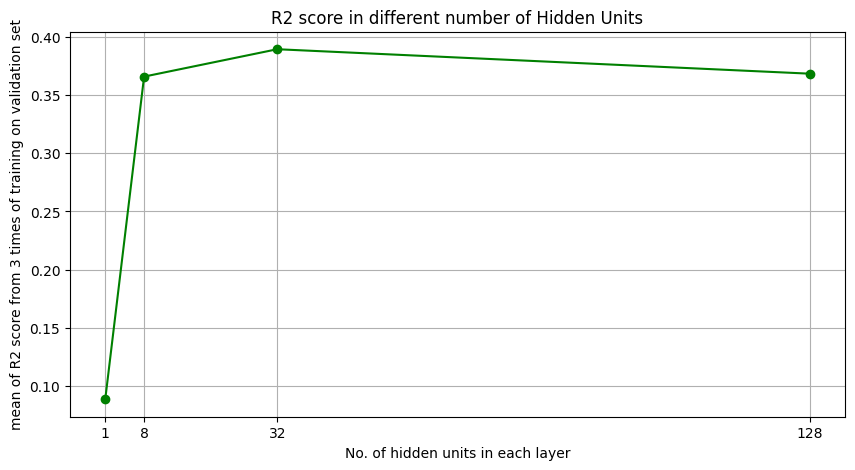

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(hidden_units, mean_r2_list, marker='o', linestyle='-', color='g')
plt.title('R2 score in different number of Hidden Units')
plt.xlabel('No. of hidden units in each layer')
plt.ylabel('mean of R2 score from 3 times of training on validation set')
plt.grid(True)
plt.xticks(hidden_units)
plt.show()

# [Q15]
Report the model setting, training time, and performance of the neural network model for each value of H. You are also expected to repeat each setting three times for the same hyperparameter setting and report the mean and standard deviation of the training time and R2 score for each setting.


In [ ]:
for i in range(len(hidden_units)):
  print("In setting where the hidden units of each layer = ",hidden_units[i],
        ", the mean and s.d. of training time =",mean_train_time_list[i]," and ",
        sd_train_time_list[i]," respectively")
  print("the mean and s.d. of R^2 score =",mean_r2_list[i]," and ",
        sd_r2_list[i]," respectively")

In setting where the hidden units of each layer =  1 , the mean and s.d. of training time = 0.8555260499318441  and  0.030687536556260078  respectively
the mean and s.d. of R^2 score = 0.08834691098727439  and  0.13006538302045748  respectively
In setting where the hidden units of each layer =  8 , the mean and s.d. of training time = 0.6651895840962728  and  0.3194727740709825  respectively
the mean and s.d. of R^2 score = 0.36602551329969896  and  0.012355988269962698  respectively
In setting where the hidden units of each layer =  32 , the mean and s.d. of training time = 0.9845972061157227  and  0.4117994896745241  respectively
the mean and s.d. of R^2 score = 0.38960351419017586  and  0.003417964817941393  respectively
In setting where the hidden units of each layer =  128 , the mean and s.d. of training time = 2.4557576974232993  and  0.9652528238633064  respectively
the mean and s.d. of R^2 score = 0.3685528759630777  and  0.0030318768756337293  respectively


# [Q16]
Compare the training time and R2 score of the linear regression model and the best neural network model.

In [ ]:

begin = time.time()
regressor.fit(np.array(x_train[q12_features]),y_train)
TT = time.time()-begin
TT

0.008498430252075195

#  Part 4: Classification
In this task, you will build a logistic regression model as well as neural network classifiers
to predict whether or not the classification target is ‘success’. You are also required to use the
train test split submodule in scikit-learn to split the data, with 80% for training and 20%
for validation. As before, we ask that you set random state = 4211 for reproducibility.

# Logistic Regression
Learning of the logistic regression model should use a gradient-descent algorithm by minimizing
the cross-entropy loss. It requires that the step size parameter η be specified. Try out a few values
(<1) and choose one that leads to stable convergence. You may also decrease η gradually during
the learning process to enhance convergence. When set properly, this can be done automatically
in scikit-learn. Use the features selected in [Q10] to train the model. During training, record
the training time for the logistic regression model. After training, you are required to evaluate
your model using accuracy and the F1 score on the validation set.

In [ ]:
eta=[0.01,0.001,0.03,]

In [ ]:
# 1 = success, 0=failure in classification target
# SelKBestdf = Kselector.fit_transform(train_x,train_y['classification target'])
new_df[train_x.columns[Kselector1.get_support()]]

,C10,C11,C12,C13,C14,C19,C1_1st phase - general contingent,C1_Over 23 years old,C20,C25,C26,C5
0,0,1,0,0,2.500000,-1.666667,0.0,0.0,-5.283503,-1.25,-4.815789,8
1,0,1,0,1,0.833333,-0.666667,0.0,1.0,-0.283503,-0.75,-0.342105,15
2,0,1,1,0,0.333333,0.333333,1.0,0.0,0.787925,0.25,0.562500,6
3,0,1,1,0,3.666667,-1.666667,0.0,1.0,-5.283503,-1.25,-4.815789,5
4,0,1,0,1,0.333333,0.333333,1.0,0.0,0.000000,0.25,0.671053,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0,0,0,0,-0.333333,0.333333,1.0,0.0,-0.263095,-0.25,-0.342105,15
3535,0,1,0,0,0.000000,0.000000,1.0,0.0,0.859354,0.75,0.167763,15
3536,0,1,0,1,0.500000,0.333333,1.0,0.0,0.787925,0.00,0.118421,15
3537,0,1,0,1,-0.166667,0.333333,1.0,0.0,0.502211,0.25,0.484962,15


In [ ]:
#Split the data set
train_LR,valid_LR = train_test_split(new_df, test_size=0.2, random_state=4211)
x_train_LR = train_LR[train_x.columns[Kselector1.get_support()]]
x_valid_LR = valid_LR[train_x.columns[Kselector1.get_support()]]
y_train_LR = train_LR['classification target']
y_valid_LR = valid_LR['classification target']

# [Q17]
Report the model setting, training time, and performance of the logistic regression model.
Since the solution found may depend on the initial weight values, you are expected to repeat each
setting three times and report the corresponding mean and standard deviation of the training
time, accuracy, and the F1 score for each setting.


In [ ]:
mean_train_time_listLR = []
mean_accuracy_listLR = []
mean_F1_listLR = []
sd_train_time_listLR = []
sd_accuracy_listLR = []
sd_F1_listLR = []


for i in eta:
  logreg = SGDClassifier(loss="log",learning_rate="adaptive",eta0=i)
  train_time_list =[]
  accuracy_list = []
  F1_list = []
  for j in range(3):
    begin = time.time()
    logreg.fit(x_train_LR, y_train_LR)
    train_time = time.time()-begin
    y_pred_LG = logreg.predict(x_valid_LR)
    train_time_list.append(train_time)
    accuracy_list.append(metrics.accuracy_score(y_valid_LR, y_pred_LG))
    F1_list.append(metrics.f1_score(y_valid_LR, y_pred_LG))
    print("Learning rate:",i,",Training Time:",train_time_list[j])
    print("Learning rate:",i,",Accuracy:",accuracy_list[j])
    print("Learning rate:",i,",F1:",F1_list[j])
    print("")
  mean_train_time_listLR.append(np.mean(train_time_list))
  mean_accuracy_listLR.append(np.mean(accuracy_list))
  mean_F1_listLR.append(np.mean(F1_list))
  sd_train_time_listLR.append(np.std(train_time_list))
  sd_accuracy_listLR.append(np.std(accuracy_list))
  sd_F1_listLR.append(np.std(F1_list))

Learning rate: 0.01 ,Training Time: 0.01594066619873047
Learning rate: 0.01 ,Accuracy: 0.8545197740112994
Learning rate: 0.01 ,F1: 0.900866217516843

Learning rate: 0.01 ,Training Time: 0.023233413696289062
Learning rate: 0.01 ,Accuracy: 0.8587570621468926
Learning rate: 0.01 ,F1: 0.9036608863198459



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Learning rate: 0.01 ,Training Time: 0.018842458724975586
Learning rate: 0.01 ,Accuracy: 0.8559322033898306
Learning rate: 0.01 ,F1: 0.9017341040462428

Learning rate: 0.001 ,Training Time: 0.018949270248413086
Learning rate: 0.001 ,Accuracy: 0.8545197740112994
Learning rate: 0.001 ,F1: 0.9006750241080038

Learning rate: 0.001 ,Training Time: 0.0183713436126709
Learning rate: 0.001 ,Accuracy: 0.8545197740112994
Learning rate: 0.001 ,F1: 0.9004830917874397

Learning rate: 0.001 ,Training Time: 0.01650404930114746
Learning rate: 0.001 ,Accuracy: 0.8559322033898306
Learning rate: 0.001 ,F1: 0.9017341040462428

Learning rate: 0.03 ,Training Time: 0.021721363067626953
Learning rate: 0.03 ,Accuracy: 0.8601694915254238
Learning rate: 0.03 ,F1: 0.9043478260869566

Learning rate: 0.03 ,Training Time: 0.01977086067199707
Learning rate: 0.03 ,Accuracy: 0.8601694915254238
Learning rate: 0.03 ,F1: 0.9043478260869566

Learning rate: 0.03 ,Training Time: 0.02005743980407715
Learning rate: 0.03 ,Accura

In [ ]:
for i in range(len(eta)):
  print(f"When eta is {eta[i]} ,")
  print(f"The mean of training time is {mean_train_time_listLR[i]}")
  print(f"The sd of training time is {sd_train_time_listLR[i]}")
  print(f"The mean of accuracy is {mean_accuracy_listLR[i]}")
  print(f"The sd of accuracy is {sd_accuracy_listLR[i]}")
  print(f"The mean of F1 score is {mean_F1_listLR[i]}")
  print(f"The sd of F1 score is {sd_F1_listLR[i]}")
  print(" ")

# stable convergence: 0.001

When eta is 0.01 ,
The mean of training time is 0.01933884620666504
The sd of training time is 0.0029978705681166736
The mean of accuracy is 0.8564030131826742
The sd of accuracy is 0.001761608939159095
The mean of F1 score is 0.9020870692943106
The sd of F1 score is 0.0011678989052644887
 
When eta is 0.001 ,
The mean of training time is 0.01794155438741048
The sd of training time is 0.00104349267809254
The mean of accuracy is 0.8549905838041432
The sd of accuracy is 0.0006658255943376485
The mean of F1 score is 0.9009640733138955
The sd of F1 score is 0.0005501030209508185
 
When eta is 0.03 ,
The mean of training time is 0.02051655451456706
The sd of training time is 0.0008599242745267952
The mean of accuracy is 0.8601694915254238
The sd of accuracy is 0.0
The mean of F1 score is 0.9043478260869566
The sd of F1 score is 0.0
 


In [ ]:
accuracy_values=[]
clf = SGDClassifier(loss="log",learning_rate="adaptive",eta0=0.001)
num_epochs = 150
for epoch in range(num_epochs):
    # Fit the model on the training data for each epoch
    clf.partial_fit(x_train_LR, y_train_LR, classes=np.unique(y_train_LR))
    # Calculate and store the accuracy for the current epoch
    accuracy = clf.score(x_train_LR, y_train_LR)
    accuracy_values.append(accuracy)


# Print the accuracy values for each epoch
# print("Accuracy values:", accuracy_values)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


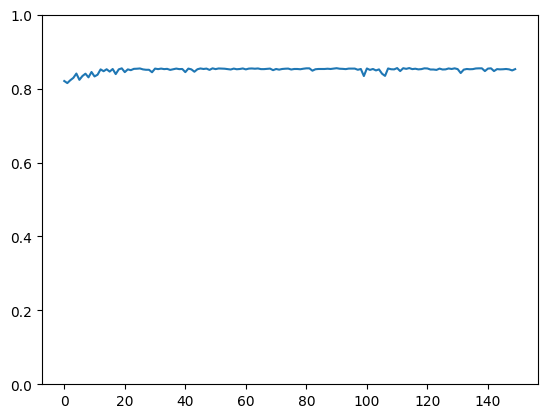

In [ ]:
fig_stable_converge,ax_sc = plt.subplots()
plt.plot(range(num_epochs),accuracy_values)
plt.ylim(0, 1)
plt.show()


# [Q18]
Plot the ROC curve calculated on the validation set with the last model in [Q17] and
report the AUC value. Give one reason why we need to examine the ROC curve as well.


In [ ]:
# The last model in Q17 is with eta0=0.03

logreglast = SGDClassifier(loss="log",learning_rate="adaptive",eta0=0.03)
logreglast.fit(x_train_LR, y_train_LR)
y_pred_q18 = logreglast.predict(x_valid_LR)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


ROC AUC score: 0.8025520071701495


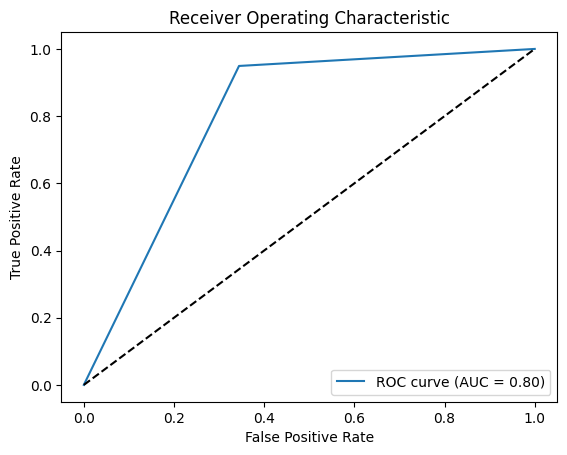

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_valid_LR, y_pred_q18)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_valid_LR, y_pred_q18)
print("ROC AUC score:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dotted line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# [Q19]
 Train the model on the training set and report the accuracy and F1 score on the validation
set using different learning rates. The random state hyperparameter is again set to 4211. Other
settings are the same as those mentioned in [Q17].

In [ ]:
mean_train_time_listLR19 = []
mean_accuracy_listLR19 = []
mean_F1_listLR19 = []
sd_train_time_listLR19 = []
sd_accuracy_listLR19 = []
sd_F1_listLR19 = []


for i in eta:
  logreg_q19 = SGDClassifier(loss="log",learning_rate="adaptive",eta0=i,random_state=4211)
  accuracy_list = []
  train_time_list = []
  F1_list = []
  for j in range(3):
    begin = time.time()
    logreg_q19.fit(x_train_LR, y_train_LR)
    train_time = time.time()-begin
    y_pred_LG = logreg_q19.predict(x_valid_LR)
    train_time_list.append(train_time)
    accuracy_list.append(metrics.accuracy_score(y_valid_LR, y_pred_LG))
    F1_list.append(metrics.f1_score(y_valid_LR, y_pred_LG))
    print("Learning rate:",i,",Train Time:",train_time_list[j])
    print("Learning rate:",i,",Accuracy:",accuracy_list[j])
    print("Learning rate:",i,",F1:",F1_list[j])
    print("")

  mean_train_time_listLR19.append(np.mean(train_time_list))
  mean_accuracy_listLR19.append(np.mean(accuracy_list))
  mean_F1_listLR19.append(np.mean(F1_list))
  sd_train_time_listLR19.append(np.std(train_time_list))
  sd_accuracy_listLR19.append(np.std(accuracy_list))
  sd_F1_listLR19.append(np.std(F1_list))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Learning rate: 0.01 ,Train Time: 0.020620107650756836
Learning rate: 0.01 ,Accuracy: 0.8559322033898306
Learning rate: 0.01 ,F1: 0.9017341040462428

Learning rate: 0.01 ,Train Time: 0.016257762908935547
Learning rate: 0.01 ,Accuracy: 0.8559322033898306
Learning rate: 0.01 ,F1: 0.9017341040462428

Learning rate: 0.01 ,Train Time: 0.01480722427368164
Learning rate: 0.01 ,Accuracy: 0.8559322033898306
Learning rate: 0.01 ,F1: 0.9017341040462428

Learning rate: 0.001 ,Train Time: 0.020821094512939453
Learning rate: 0.001 ,Accuracy: 0.8587570621468926
Learning rate: 0.001 ,F1: 0.9036608863198459

Learning rate: 0.001 ,Train Time: 0.017657041549682617
Learning rate: 0.001 ,Accuracy: 0.8587570621468926
Learning rate: 0.001 ,F1: 0.9036608863198459

Learning rate: 0.001 ,Train Time: 0.02078080177307129
Learning rate: 0.001 ,Accuracy: 0.8587570621468926
Learning rate: 0.001 ,F1: 0.9036608863198459

Learning rate: 0.03 ,Train Time: 0.015798568725585938
Learning rate: 0.03 ,Accuracy: 0.861581920903

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
for i in range(len(eta)):
  print(f"When eta is {eta[i]} ,")
  print(f"The mean of training time is {mean_train_time_listLR19[i]}")
  print(f"The sd of training time is {sd_train_time_listLR19[i]}")
  print(f"The mean of accuracy is {mean_accuracy_listLR19[i]}")
  print(f"The sd of accuracy is {sd_accuracy_listLR19[i]}")
  print(f"The mean of F1 score is {mean_F1_listLR19[i]}")
  print(f"The sd of F1 score is {sd_F1_listLR19[i]}")
  print(" ")

When eta is 0.01 ,
The mean of training time is 0.017228364944458008
The sd of training time is 0.002470351462496722
The mean of accuracy is 0.8559322033898306
The sd of accuracy is 0.0
The mean of F1 score is 0.9017341040462427
The sd of F1 score is 1.1102230246251565e-16
 
When eta is 0.001 ,
The mean of training time is 0.019752979278564453
The sd of training time is 0.0014821430652345456
The mean of accuracy is 0.8587570621468926
The sd of accuracy is 0.0
The mean of F1 score is 0.9036608863198459
The sd of F1 score is 0.0
 
When eta is 0.03 ,
The mean of training time is 0.01934989293416341
The sd of training time is 0.002990179229784613
The mean of accuracy is 0.8615819209039547
The sd of accuracy is 1.1102230246251565e-16
The mean of F1 score is 0.9054054054054054
The sd of F1 score is 0.0
 


# Feedforward Neural Networks
Neural network classifiers generalize logistic regression by introducing one or more hidden layers.
Their learning algorithm is similar to that for logistic regression, as described above. Remember
to standardize the features before training and validation.
You need to try different numbers of hidden units H ∈ {1, 8, 32, 128} to build different threehidden-
layer neural networks. The hyperparameter early stopping can be set to ‘True’ to avoid
overfitting (default is ‘False’). The other hyperparameters may just take their default values.
During training, you are expected to record the training time of each model. After training,
evaluate your models using accuracy and the F1 score on the validation set. You have to report
the accuracy and F1 score for each value of H by plotting them using matplotlib.


In [ ]:
num_nuerons = [1,8,32,128]
# new_df is standardised
mean_train_time_list = []
mean_accuracy_list = []
mean_F1_list = []
sd_train_time_list = []
sd_accuracy_list = []
sd_F1_list = []


for i in num_nuerons:
  fnnmodel = MLPClassifier(hidden_layer_sizes=(i,i,i), early_stopping=True)
  train_time_list =[]
  accuracy_list = []
  F1_list = []
  for j in range(3):
    begin = time.time()
    fnnmodel.fit(x_train_LR,y_train_LR)
    train_time = time.time()-begin
    y_pred_LG = fnnmodel.predict(x_valid_LR)
    train_time_list.append(train_time)
    accuracy = metrics.accuracy_score(y_valid_LR, y_pred_LG)
    accuracy_list.append(accuracy)
    F1_list.append(metrics.f1_score(y_valid_LR, y_pred_LG))
    print("number of hidden units:",i,",Training Time:",train_time_list[j])
    print("number of hidden units:",i,",Accuracy:",accuracy_list[j])
    print("number of hidden units:",i,",F1:",F1_list[j])
    print("")
  mean_train_time_list.append(np.mean(train_time_list))
  mean_accuracy_list.append(np.mean(accuracy_list))
  mean_F1_list.append(np.mean(F1_list))
  sd_train_time_list.append(np.std(train_time_list))
  sd_accuracy_list.append(np.std(accuracy_list))
  sd_F1_list.append(np.std(F1_list))


number of hidden units: 1 ,Training Time: 0.07936286926269531
number of hidden units: 1 ,Accuracy: 0.6963276836158192
number of hidden units: 1 ,F1: 0.8209825145711906

number of hidden units: 1 ,Training Time: 0.0884544849395752
number of hidden units: 1 ,Accuracy: 0.3036723163841808
number of hidden units: 1 ,F1: 0.0

number of hidden units: 1 ,Training Time: 0.07884645462036133
number of hidden units: 1 ,Accuracy: 0.6963276836158192
number of hidden units: 1 ,F1: 0.8209825145711906

number of hidden units: 8 ,Training Time: 0.2068319320678711
number of hidden units: 8 ,Accuracy: 0.8629943502824858
number of hidden units: 8 ,F1: 0.9057337220602527

number of hidden units: 8 ,Training Time: 0.2575540542602539
number of hidden units: 8 ,Accuracy: 0.8361581920903954
number of hidden units: 8 ,F1: 0.8895238095238095

number of hidden units: 8 ,Training Time: 0.3925600051879883
number of hidden units: 8 ,Accuracy: 0.8502824858757062
number of hidden units: 8 ,F1: 0.8968871595330739

numbe


# [Q20]
Report the model setting, training time, and performance of the neural networks for each value of H. You are also expected to repeat each setting three times and report the mean and standard deviation of the training time, accuracy, and the F1 score for each setting.




In [ ]:
for i in range(len(num_nuerons)):
  print(f"When number of hidden units is {num_nuerons[i]} ,")
  print(f"The mean of training time is {mean_train_time_list[i]}")
  print(f"The sd of training time is {sd_train_time_list[i]}")
  print(f"The mean of accuracy is {mean_accuracy_list[i]}")
  print(f"The sd of accuracy is {sd_accuracy_list[i]}")
  print(f"The mean of F1 score is {mean_F1_list[i]}")
  print(f"The sd of F1 score is {sd_F1_list[i]}")
  print(" ")

When number of hidden units is 1 ,
The mean of training time is 0.08222126960754395
The sd of training time is 0.00441258813338282
The mean of accuracy is 0.565442561205273
The sd of accuracy is 0.18509951522585705
The mean of F1 score is 0.5473216763807938
The sd of F1 score is 0.3870148688592483
 
When number of hidden units is 8 ,
The mean of training time is 0.2856486638387044
The sd of training time is 0.07838243681570539
The mean of accuracy is 0.8498116760828625
The sd of accuracy is 0.010960872624126946
The mean of F1 score is 0.897381563705712
The sd of F1 score is 0.006626896846650839
 
When number of hidden units is 32 ,
The mean of training time is 0.35466917355855304
The sd of training time is 0.04392850782858612
The mean of accuracy is 0.8677024482109229
The sd of accuracy is 0.005804532959481116
The mean of F1 score is 0.9090140544146479
The sd of F1 score is 0.002444150776185761
 
When number of hidden units is 128 ,
The mean of training time is 1.6271923383076985
The s

# [Q21]
Plot the accuracy and F1 score for each value of H. Suggest a possible reason for the gap between the accuracy and F1 score.




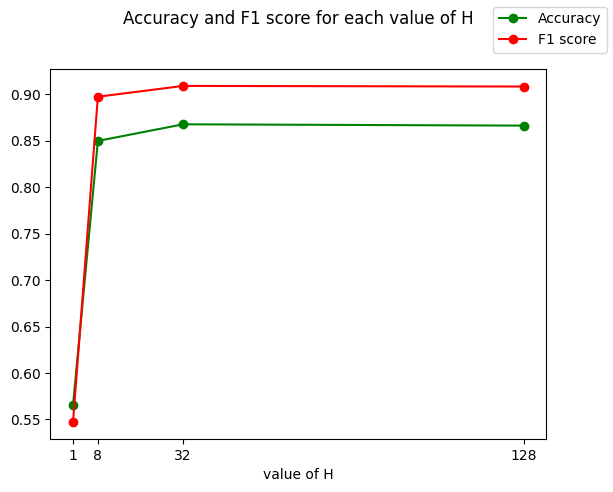

In [ ]:
fig1, ax1 = plt.subplots()
plt.xticks(num_nuerons)
plt.title('Accuracy and F1 score for each value of H', y=1.1)
plt.xlabel('value of H')
plt.plot(num_nuerons, mean_accuracy_list, marker='o', linestyle='-', color='g',label="Accuracy")
plt.plot(num_nuerons, mean_F1_list, marker='o', linestyle='-', color='r',label="F1 score")
fig1.legend()
plt.show()



# [Q22]
Compare the training time, accuracy, and the F1 score of the logistic regression model and the best neural network model.




In [ ]:

best_nn_index = np.argmax(mean_F1_list)
if mean_train_time_listLR19[1] > mean_train_time_list[best_nn_index] :
  print(f"The training time of logistic regression = {mean_train_time_listLR19[1]} is longer than that of the best neural network model, which has 128 hidden units in each layer. The training time of the latter is {mean_train_time_list[best_nn_index]}")
elif  mean_train_time_listLR19[1] < mean_train_time_list[best_nn_index] :
  print(f"The training time of logistic regression = {mean_train_time_listLR19[1]} is shorter than that of the best neural network model, which has 128 hidden units in each layer. The training time of the latter is {mean_train_time_list[best_nn_index]}")

if mean_accuracy_listLR19[1] > mean_accuracy_list[best_nn_index] :
  print(f"The accuracy of logistic regression = {mean_accuracy_listLR19[1]} is higher than that of the best neural network model, which has 128 hidden units in each layer. The accuracy of the latter is {mean_accuracy_list[best_nn_index]}")
elif mean_accuracy_listLR19[1] < mean_accuracy_list[best_nn_index]:
  print(f"The accuracy of logistic regression = {mean_accuracy_listLR19[1]} is lower than that of the best neural network model, which has 128 hidden units in each layer. The accuracy of the latter is {mean_accuracy_list[best_nn_index]}")
if mean_F1_listLR19[1] > mean_F1_list[best_nn_index] :
  print(f"The F1 score of logistic regression = {mean_F1_listLR19[1]} is higher than that of the best neural network model, which has 128 hidden units in each layer. The F1 score of the latter is {mean_F1_list[best_nn_index]}")
elif mean_F1_listLR19[1] < mean_F1_list[best_nn_index] :
  print(f"The F1 score of logistic regression = {mean_F1_listLR19[1]} is lower than that of the best neural network model, which has 128 hidden units in each layer. The F1 score of the latter is {mean_F1_list[best_nn_index]}")


The training time of logistic regression = 0.019752979278564453 is shorter than that of the best neural network model, which has 128 hidden units in each layer. The training time of the latter is 0.35466917355855304
The accuracy of logistic regression = 0.8587570621468926 is lower than that of the best neural network model, which has 128 hidden units in each layer. The accuracy of the latter is 0.8677024482109229
The F1 score of logistic regression = 0.9036608863198459 is lower than that of the best neural network model, which has 128 hidden units in each layer. The F1 score of the latter is 0.9090140544146479


# [Q23]
 Do you notice any trend when you increase the hidden layer size from 1 to 128? If so, please describe what the trend is and suggest a reason for your observation.

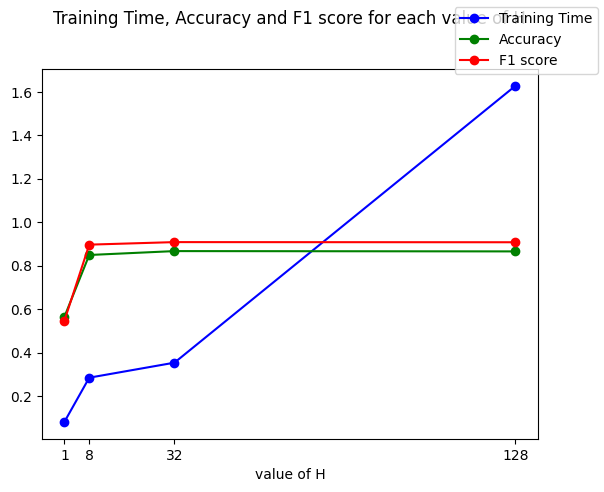

In [ ]:
fig1, ax1 = plt.subplots()
plt.xticks(num_nuerons)
plt.title('Training Time, Accuracy and F1 score for each value of H', y=1.1)
plt.xlabel('value of H')
plt.plot(num_nuerons, mean_train_time_list, marker='o', linestyle='-', color='b',label="Training Time")
plt.plot(num_nuerons, mean_accuracy_list, marker='o', linestyle='-', color='g',label="Accuracy")
plt.plot(num_nuerons, mean_F1_list, marker='o', linestyle='-', color='r',label="F1 score")
fig1.legend()
plt.show()


#Part 5: Performance Enhancement
8.1 Preprocessing Validation
This section aims to demonstrate the impact of different preprocessing techniques on model
performance by constructing and evaluating multiple pipelines. This task is designed to provide
hands-on experience with sklearn’s Pipeline and ColumnTransformer utilities, enabling
efficient experimentation with various preprocessing strategies. You could use Pipeline to
create a sequence of preprocessing steps for numerical and categorical data separately. Then,
ColumnTransformer could be used to apply the respective pipelines to your dataset’s numerical
and categorical columns. Your task is to evaluate how different preprocessing combinations affect
the performance of three-hidden-layer neural networks to predict whether or not the target
is a success.

In [3]:
df_pe = pd.read_csv(trainpath)
# First encode the classification target into 0 and 1
numerical = df_pe.select_dtypes(include=[np.number]).iloc[:,:-1]
categorical = df_pe[df_pe.columns.difference(numerical.columns)]
categorical = categorical[['C0', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15']]
x_train_pe, x_valid_pe, y_train_pe, y_valid_pe = train_test_split(df_pe.iloc[:,:-2],df_pe['classification target'] , test_size=0.2, random_state=4211)
print(df_pe.columns)
print(numerical.columns)
print(categorical.columns)

Index(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30',
       'regression target', 'classification target'],
      dtype='object')
Index(['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23',
       'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30'],
      dtype='object')
Index(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C15'],
      dtype='object')


# [Q24]
Combination A: For numerical features, apply StandardScaler and SimpleImputer
with mean strategy for imputation. For categorical features, use OneHotEncoder for encoding.
Do not apply feature selection and feature engineering. Validate this combination with a neural
network model.

In [ ]:

def create_pipelines(scaler,imputer,encoder):
    num_prepipeline = pipeline.Pipeline([('imputer',imputer),('scaler',scaler)])
    cat_prepipeline = pipeline.Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',encoder)])
    preprocess = ColumnTransformer([('numeric preprocess',num_prepipeline,numerical.columns),('categorical preprocess',cat_prepipeline,categorical.columns)])
    pipeline_classification = pipeline.Pipeline([('preprocessor',preprocess),('classifier', MLPClassifier(hidden_layer_sizes=(128, 128, 128), random_state=4211))])
    #xtrainA = preprocess.fit_transform(x_train_pe)
    #xtestA = preprocess.fit_transform(x_valid_pe)
    return pipeline_classification



In [ ]:
# StandardScaler
# SimpleImputer-mean
# OneHotEncoder
pipeline_A = create_pipelines(StandardScaler(),SimpleImputer(strategy='mean'),OneHotEncoder(handle_unknown='ignore'))
pipeline_A.fit(x_train_pe,y_train_pe)
y_pred_A = pipeline_A.predict(x_valid_pe)
accuracy = metrics.accuracy_score(y_valid_pe,y_pred_A)
#xtrainA,xtestA,ytrainA,ytestA = train_test_split(dfA.iloc[:,:-2],dfA['classification target'] , test_size=0.2, random_state=4211)

In [ ]:
print("Accuracy is",accuracy)
print("F1 score is",metrics.f1_score(y_valid_pe,y_pred_A,pos_label="success"))

Accuracy is 0.8389830508474576
F1 score is 0.8829568788501027


# [Q25] Combination B:
For numerical features, use MinMaxScaler for normalization and
SimpleImputer with zero strategy for imputation. For categorical features, encode ordinal features
with OrdinalEncoder and remaining with OneHotEncoder. Do not apply feature selection
and feature engineering. Validate this combination with a neural network model.


In [5]:
ordinal = ['C2','C5']
remain = [x for x in categorical.columns if x not in ordinal]


def create_pipelinesB(scaler,imputer):
    num_prepipeline = pipeline.Pipeline([('imputer',imputer),('scaler',scaler)])
    ord_prepipeline = pipeline.Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))])
    cat_prepipeline = pipeline.Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(handle_unknown='ignore'))])
    preprocess = ColumnTransformer([('numeric preprocess',num_prepipeline,numerical.columns),('categorical preprocess',cat_prepipeline,remain),('ordinal preprocess',ord_prepipeline,ordinal)])
    pipeline_classification = pipeline.Pipeline([('preprocessor',preprocess),('classifier', MLPClassifier(hidden_layer_sizes=(128, 128, 128), random_state=4211))])
    #xtrainA = preprocess.fit_transform(x_train_pe)
    #xtestA = preprocess.fit_transform(x_valid_pe)
    return pipeline_classification



In [ ]:
#MinMaxScaler
#SimpleImputer-constant
#OrdinalEncoder for ordinal(C2,C5)
#remaining one hot
pipelineB = create_pipelinesB(MinMaxScaler(),SimpleImputer(strategy='constant'))
pipelineB.fit(x_train_pe,y_train_pe)
y_pred_B = pipelineB.predict(x_valid_pe)
accuracy = metrics.accuracy_score(y_valid_pe,y_pred_B)
print("Accuracy is",accuracy)
print("F1 score is",metrics.f1_score(y_valid_pe,y_pred_B,pos_label="success"))

Accuracy is 0.8290960451977402
F1 score is 0.8732984293193716


# [Q26]
Combination C: Create a custom combination where you choose a different preprocessing
technique for numerical and categorical features based on your hypothesis of what might work
best. This could also involve custom encoders, any appropriate feature selection, or engineering
techniques. Validate this combination with a neural network model.

In [ ]:
#RobustScaler
#SimpleImputer-median
#OrdinalEncoder for ordinal(C2,C5)
#remaining one hot
pipelineC = create_pipelinesB(RobustScaler(),SimpleImputer(strategy='median'))
pipelineC.fit(x_train_pe,y_train_pe)
y_pred_C = pipelineC.predict(x_valid_pe)
accuracy = metrics.accuracy_score(y_valid_pe,y_pred_C)
print("Accuracy is",accuracy)
print("F1 score is",metrics.f1_score(y_valid_pe,y_pred_C,pos_label="success"))

Accuracy is 0.8502824858757062
F1 score is 0.8927125506072874


# 8.2 Hyperparameter Tuning
In this task, you need to use grid search to tune the hyperparameters of a three-hidden-layer
feedforward neural network model to predict whether or not the target is a success. All the
hyperparameters defined in the MLPClassifier class in scikit-learn except the number of
hidden layers can be tuned. Use the best preprocessing techniques in [Q26] and features selected
in [Q10] for training and testing.
You are required to use the model selection submodule in scikit-learn to facilitate performing
grid search cross-validation for hyperparameter tuning. This is done by randomly sampling
80% of the training instances to train a classifier and then validating it on the remaining 20%.
Five such random data splits are performed and the average over these five trials is used to
estimate the generalization performance. You are expected to try at least 10 combinations of
the hyperparameter setting. Set the random state hyperparameter of the neural network model
to 4211 for reproducibility and early stopping to ‘True’ to avoid overfitting.


In [12]:
#train_x.columns[Kselector1.get_support() is the features selected, below is the result of Q10
# SelectKBest method for classification
selected_features = ['C10', 'C11', 'C12', 'C13', 'C14', 'C19',
       'C1_1st phase - general contingent', 'C1_Over 23 years old', 'C20',
       'C25', 'C26', 'C5']
#Best processing technique: pipelineC
x_train_ht,x_valid_ht,y_train_ht,y_valid_ht=train_test_split(df_pe.iloc[:,:-2],df_pe['classification target'] , test_size=0.2, random_state=4211)
numht_features = x_train_ht.select_dtypes(include=[np.number])
categorical_ht = x_train_ht.columns.difference(numht_features.columns)
numht_features = numht_features.columns
remain_ht = remain

param_grid = {
        'classifier__hidden_layer_sizes': [(50, 50, 50), (128, 128, 128), (50, 200, 128)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['sgd', 'adam'],
        'classifier__alpha': [0.0001, 0.0002, 0.0003],
        'classifier__learning_rate': ['constant', 'adaptive'],
}




num_prepipeline = pipeline.Pipeline([('imputer',SimpleImputer(strategy='median')),('scaler',RobustScaler())])
ord_prepipeline = pipeline.Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))])
cat_prepipeline = pipeline.Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(handle_unknown='ignore'))])
preprocess = ColumnTransformer([('numeric preprocess',num_prepipeline,numerical.columns),('categorical preprocess',cat_prepipeline,remain),('ordinal preprocess',ord_prepipeline,ordinal)])
feature_pipeline_ht =pipeline.Pipeline([('feature selection',SelectKBest(k=12))])
pipeline_classification_ht = pipeline.Pipeline([('preprocessor',preprocess),('feature_selection',feature_pipeline_ht),('classifier', MLPClassifier(hidden_layer_sizes=(128, 128, 128), random_state=4211))])
grid_search = model_selection.GridSearchCV(pipeline_classification_ht,param_grid, cv=5,scoring='accuracy',n_jobs=-1) #cv's default = 5-fold cross validation,



In [13]:
grid_search.fit(x_train_ht,y_train_ht)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric '
                                                                         'preprocess',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23',
       'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30'],
      dtype='object')),
                                                                        ('categorical '
                                                                         'prepr...
                                        MLPClassifier(hidden_layer_sizes=(128,
                                                                          128,
                                                                          128),
                                                      random_state=4211))]),
             n_jobs=-1,
             param_grid={'classifier__activation': ['tanh', 'relu'],
                         'classifier__alpha': [0.0001, 0.0002, 0.0003],
                         'classifier__hidden_layer_sizes': [(50, 50, 50),
                                                            (128, 128, 128),
                                                            (50, 200, 128)],
                         'classifier__learning_rate': ['constant', 'adaptive'],
                         'classifier__solver': ['sgd', 'adam']},
             scoring='accuracy')

# [Q27]
 Report five combinations of the hyperparameter setting and highlight the best hyperparameter
setting in terms of accuracy. You also need to report the mean and standard deviation


In [23]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
results = pd.DataFrame(grid_search.cv_results_)
top_five_results = results[['param_classifier__activation', 'param_classifier__alpha',
       'param_classifier__hidden_layer_sizes',
       'param_classifier__learning_rate', 'param_classifier__solver', 'mean_test_score','std_test_score']].head(5)

In [24]:
print(f"The best hyperparameter setting is the one having {best_score} accuracy")
print(f"Its hyperparameter setting is {best_params}")
print(top_five_results)

The best hyperparameter setting is the one having 0.861881703342245 accuracy
Its hyperparameter setting is {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 200, 128), 'classifier__learning_rate': 'constant', 'classifier__solver': 'sgd'}
  param_classifier__activation param_classifier__alpha  \
0                         tanh                  0.0001   
1                         tanh                  0.0001   
2                         tanh                  0.0001   
3                         tanh                  0.0001   
4                         tanh                  0.0001   

  param_classifier__hidden_layer_sizes param_classifier__learning_rate  \
0                         (50, 50, 50)                        constant   
1                         (50, 50, 50)                        constant   
2                         (50, 50, 50)                        adaptive   
3                         (50, 50, 50)                        ad